In [78]:
%matplotlib inline
import numpy as np
import pandas as pd # :)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, svm, metrics

from sklearn import svm, datasets, linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from time import time

import os
from sklearn import preprocessing

# Time, Interpolated, Sensor1-14
titles = ["Time", "Interpolated", "Sensor1", "Sensor2", "Sensor3", "Sensor4", "Sensor5", "Sensor6", "Sensor7", "Sensor8", "Sensor9", "Sensor10", "Sensor11", "Sensor12", "Sensor13", "Sensor14"]

filenames = []

for z in range(1,30):
    if(z == 6):
        filenames.append("C:/Users/paulj/Desktop/BCI-SSVEP_Database_Aceves/A00" + str(z) + "SM1_3.csv")
    if(z < 10 and z != 6):
        filenames.append("C:/Users/paulj/Desktop/BCI-SSVEP_Database_Aceves/A00" + str(z) + "SM1_1.csv")
    if(z >= 10 and z != 20):
        filenames.append("C:/Users/paulj/Desktop/BCI-SSVEP_Database_Aceves/A0" + str(z) + "SM1_1.csv")

        
#print(len(filenames))
dataframes = []

for i in range(28):
    dataframes.append(pd.read_csv(filenames[i], header=0, names=titles));

In [79]:
desired_cols = ['Sensor1', "Sensor2", "Sensor3", "Sensor4", "Sensor5", "Sensor6", "Sensor7", "Sensor8", "Sensor9", "Sensor10", "Sensor11", "Sensor12", "Sensor13", "Sensor14"]

fulldata = []
for i in range(28):
    fulldata.append(dataframes[i].loc[:,desired_cols])

    
stab, ropen, lopen, bopen, rclosed, lclosed, bclosed = [], [], [], [], [], [], []

'''
y = []
for i in range(3200):
    y.append(0)
for i in range(6):
    for i in range(640):
        y.append(i)

for i in fulldata:
    stab.append(i.loc[:3200,:])
    
for i in fulldata:
    ropen.append(i.loc[3200:3840,:])
    
for i in fulldata:
    lopen.append(i.loc[3840:4480,:])
    
for i in fulldata:
    bopen.append(i.loc[4480:5120,:])
    
for i in fulldata:
    rclosed.append(i.loc[5120:5760,:])
    
for i in fulldata:
    lclosed.append(i.loc[5760:6400,:])
    
for i in fulldata:
    bclosed.append(i.loc[6400:7040,:])
'''

y = []
for i in range(3200):
    y.append(0)
for i in range(6):
    for i in range(640):
        y.append(i)

for i in fulldata:
    stab.append(i.loc[len(i)-3841:,:])

for i in fulldata:
    ropen.append(i.loc[len(i)-3840:len(i)-3201,:])
    
for i in fulldata:
    lopen.append(i.loc[len(i)-3200:len(i)-2561,:])
    
for i in fulldata:
    bopen.append(i.loc[len(i)-2560:len(i)-1921,:])
    
for i in fulldata:
    rclosed.append(i.loc[len(i)-1920:len(i)-1281,:])
    
for i in fulldata:
    lclosed.append(i.loc[len(i)-1280:len(i)-641,:])
    
for i in fulldata:
    bclosed.append(i.loc[len(i)-640:len(i)-1,:])

In [125]:
# Input a sensor and a sample, and return the results of the 3 models

def trainSensor(inputSensor, sample):
    sensorTrain = []
    yTrain = []
    testRange = range(5,28)
    
    # Go through each test and add the sensor data to the training set
    for i in testRange:
        sensorTrain.append(ropen[i][inputSensor].values)
        yTrain.append('ropen')
    for i in testRange:
        sensorTrain.append(lopen[i][inputSensor].values)
        yTrain.append('lopen')
    for i in testRange:
        sensorTrain.append(bopen[i][inputSensor].values)
        yTrain.append('bopen')
    for i in testRange:
        sensorTrain.append(rclosed[i][inputSensor].values)
        yTrain.append('rclosed')
    for i in testRange:
        sensorTrain.append(lclosed[i][inputSensor].values)
        yTrain.append('lclosed')
    for i in testRange:
        sensorTrain.append(bclosed[i][inputSensor].values)
        yTrain.append('bclosed')
    
    
    #print(sensorTrain)
    df = pd.DataFrame(data=sensorTrain)
    
    df.fillna(4222, inplace=True)
    
    #print(df)
    
    
    alf=RandomForestClassifier(n_estimators=100)
    alf.fit(df, yTrain)
    
    blf= svm.SVC(kernel = 'linear', gamma = 'auto')
    blf.fit(df, yTrain)
    
    clf = svm.SVC(kernel= 'rbf', gamma=0.0001)
    clf.fit(df, yTrain)
    
    #print(sample)

    predictionA = alf.predict(sample.values.reshape(1,-1))
    predictionB = blf.predict(sample.values.reshape(1,-1))
    predictionC = clf.predict(sample.values.reshape(1,-1))
    
    return(predictionA[0], predictionB[0], predictionC[0])

In [126]:
# So the input is going to be one of the 28 * 6 sensor reading collections, and the goal is to analyze it.
# Idea was to train each sensor individually, so first figure out method to split data?
def train(inputList):
    count = 0
    prediction = pd.DataFrame()
    
    for i in desired_cols:
        prediction[count] = trainSensor(i, inputList[i])
        count = count + 1

    return prediction

In [127]:
def test(inputList, currentValue):

    x = train(inputList)
    Z = x.values.tolist()

    #print("Test Value: " + currentValue)

    '''
    print(Z[0].count('ropen'), Z[0].count('lopen'), Z[0].count('bopen'), Z[0].count('rclosed'), Z[0].count('lclosed'), Z[0].count('bclosed'))
    print(Z[1].count('ropen'), Z[1].count('lopen'), Z[1].count('bopen'), Z[1].count('rclosed'), Z[1].count('lclosed'), Z[1].count('bclosed'))
    print(Z[2].count('ropen'), Z[2].count('lopen'), Z[2].count('bopen'), Z[2].count('rclosed'), Z[2].count('lclosed'), Z[2].count('bclosed'))
    '''

    sumForest = Z[0].count('ropen') + Z[0].count('lopen') + Z[0].count('bopen') + Z[0].count('rclosed') + Z[0].count('lclosed') + Z[0].count('bclosed')
    forestFraction = Z[0].count(currentValue) / sumForest

    sumSigmoid = Z[1].count('ropen') + Z[1].count('lopen') + Z[1].count('bopen') + Z[1].count('rclosed') + Z[1].count('lclosed') + Z[1].count('bclosed')
    sigmoidFraction = Z[1].count(currentValue) / sumSigmoid

    sumRBF = Z[2].count('ropen') + Z[2].count('lopen') + Z[2].count('bopen') + Z[2].count('rclosed') + Z[2].count('lclosed') + Z[2].count('bclosed')
    rbfFraction = Z[2].count(currentValue) / sumRBF

    '''
    print()
    print("% Correct:")
    print('Random Forest: ' + str(forestFraction))
    print('Linear SVM: ' + str(sigmoidFraction))
    print('RBF SVM: ' + str(rbfFraction))
    '''

    pr = [0,0,0,0,0,0]
    pr[0] = Z[0].count('ropen') + Z[1].count('ropen') + Z[2].count('ropen')
    pr[1] = Z[0].count('lopen') + Z[1].count('lopen') + Z[2].count('lopen')
    pr[2] = Z[0].count('bopen') + Z[1].count('bopen') + Z[2].count('bopen')
    pr[3] = Z[0].count('rclosed') + Z[1].count('rclosed') + Z[2].count('rclosed')
    pr[4] = Z[0].count('lclosed') + Z[1].count('lclosed') + Z[2].count('lclosed')
    pr[5] = Z[0].count('bclosed') + Z[1].count('bclosed') + Z[2].count('bclosed')

    if(pr[0] == max(pr)):
        solution = 'ropen'
    elif(pr[1] == max(pr)):
        solution = 'lopen'
    elif(pr[2] == max(pr)):
        solution = 'bopen'
    elif(pr[3] == max(pr)):
        solution = 'rclosed'
    elif(pr[4] == max(pr)):
        solution = 'lclosed'
    elif(pr[5] == max(pr)):
        solution = 'bclosed'

    #print('Prediction: ' + solution)
    return(solution)

In [128]:
categories = ['ropen', 'lopen', 'bopen', 'rclosed', 'lclosed', 'bclosed']
lists = [ropen, lopen, bopen, rclosed, lclosed, bclosed]


sum = 0
correct = 0
cPos = 0

for j in range(6):
    for i in range(5): # Test Values
        x = test(lists[j][i], categories[j])
        if(x == categories[j]):
            correct = correct + 1
        if((x == categories[0] or x == categories[1] or x == categories[3] or x == categories[4]) and (j == 0 or j == 1 or j == 3 or j == 4)):
            cPos = cPos + 1
            print(x + ' '+ categories[j])
        if((x == categories[2] or x == categories[5]) and (j == 2 or j == 5)):
            cPos = cPos + 1
            print(x + ' ' + categories[j])
        sum = sum + 1
        

        
print()
print('Net Accuracy: ' + str(correct/sum))
print()
print('Position Accuracy: ' + str(cPos/sum))

#x = test(bclosed[26], 'bclosed')
#print(x)

lopen ropen
lclosed ropen
lopen ropen
lopen lopen
ropen lopen
lclosed lopen
lopen lopen
bopen bopen
bopen bopen
lopen rclosed
lopen rclosed
rclosed rclosed
lopen rclosed
rclosed lclosed
lopen lclosed
bclosed bclosed
bclosed bclosed
bclosed bclosed
bclosed bclosed

Net Accuracy: 0.3

Position Accuracy: 0.6333333333333333


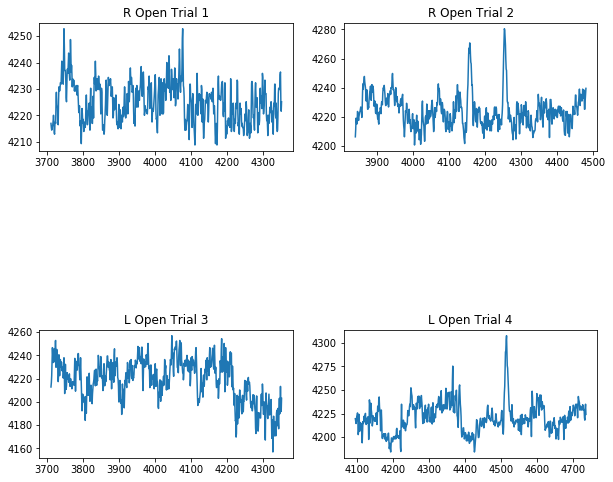

In [129]:
test = True
if test:
    plt.figure(figsize = (10,8));
    plt.subplot(321)
    plt.plot(ropen[1]["Sensor1"])
    plt.title('R Open Trial 1')

    plt.subplot(322)
    plt.plot(ropen[2]["Sensor1"]);
    plt.title('R Open Trial 2')

    plt.subplot(325)
    plt.plot(ropen[3]["Sensor1"])
    plt.title('L Open Trial 3')

    plt.subplot(326)
    plt.plot(ropen[4]["Sensor1"]);
    plt.title('L Open Trial 4')